In [50]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')

In [52]:
y = df['target']

In [53]:
x = df.drop('target',axis=1)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**LogisticRegression - GridSearchCV**

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(penalty='l2')

val = list(np.arange(1, 10, 1))

parameters = {'solver':('newton-cg', 'liblinear', 'sag', 'saga'), 'C':val}

clf_lr = GridSearchCV(lr_model, parameters)
clf_lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')})

In [56]:
print(clf_lr.best_params_)

{'C': 1, 'solver': 'newton-cg'}


In [57]:
test_pred = clf_lr.predict(x_test)

In [58]:
acc_lr_gs = accuracy_score(test_pred,y_test)
acc_lr_gs

0.8461538461538461

**KNeighborsClassifier - GridSearchCV**

In [59]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

val = list(np.arange(1,30, 1))

parameters = {'n_neighbors':val}

clf_knn = GridSearchCV(neigh, parameters)
clf_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [60]:
print(clf_knn.best_params_)

{'n_neighbors': 13}


In [61]:
test_pred_knn = clf_knn.predict(x_test)

In [62]:
accuracy_knn_gs = accuracy_score(test_pred_knn, y_test)
accuracy_knn_gs

0.5604395604395604

**DecisionTreeClassifier - GridSearchCV**

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [64]:
clf = DecisionTreeClassifier(random_state=1024)

param_grid = {
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : np.arange(5,10,1),
              'criterion' :['gini', 'entropy']
             }

clf_dtc = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=True)

clf_dtc.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [65]:
print(clf_dtc.best_params_)

{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}


In [66]:
test_pred_dtc = clf_dtc.predict(x_test)

In [67]:
accuracy_dtc_gs = metrics.accuracy_score(y_test, test_pred_dtc)
accuracy_dtc_gs

0.7912087912087912

The accuracy rate has improved to 76.9% using GridSearchCV

**CONFUSION MATRIX**

**Logistic Regression**

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[40,  7],
       [ 7, 37]])

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        47
           1       0.84      0.84      0.84        44

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



**KNeighborsClassifier**

In [70]:
confusion_matrix(test_pred_knn,y_test)

array([[23, 16],
       [24, 28]])

In [71]:
print(classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       0.59      0.49      0.53        47
           1       0.54      0.64      0.58        44

    accuracy                           0.56        91
   macro avg       0.56      0.56      0.56        91
weighted avg       0.56      0.56      0.56        91



**DecisionTreeClassifier**

In [72]:
confusion_matrix(test_pred_dtc,y_test)

array([[30,  2],
       [17, 42]])

In [73]:
print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76        47
           1       0.71      0.95      0.82        44

    accuracy                           0.79        91
   macro avg       0.82      0.80      0.79        91
weighted avg       0.83      0.79      0.79        91



Thus by comparing the values of each models, we can conclude that DecisionTreeClassifier gives efficient recall and accuracy.

**DAY 8**

---

**To Plot a Graph of Receiver Operating Characteristic Curve (ROC) with FPR at the x axis and TPR at the y axis and to find the roc_auc score**

In [74]:
prob_lr = clf_lr.predict_proba(x_test)
prob_knn = clf_knn.predict_proba(x_test)
prob_dtc = clf_dtc.predict_proba(x_test)

In [75]:
#keeping only the 2nd column (positive values) and discarding the 1st column (negative values)
prob_lr =  prob_lr[:, 1]
prob_knn = prob_knn[:, 1]
prob_dtc = prob_dtc[:, 1]

In [76]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, prob_lr)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, prob_knn)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(y_test, prob_dtc)

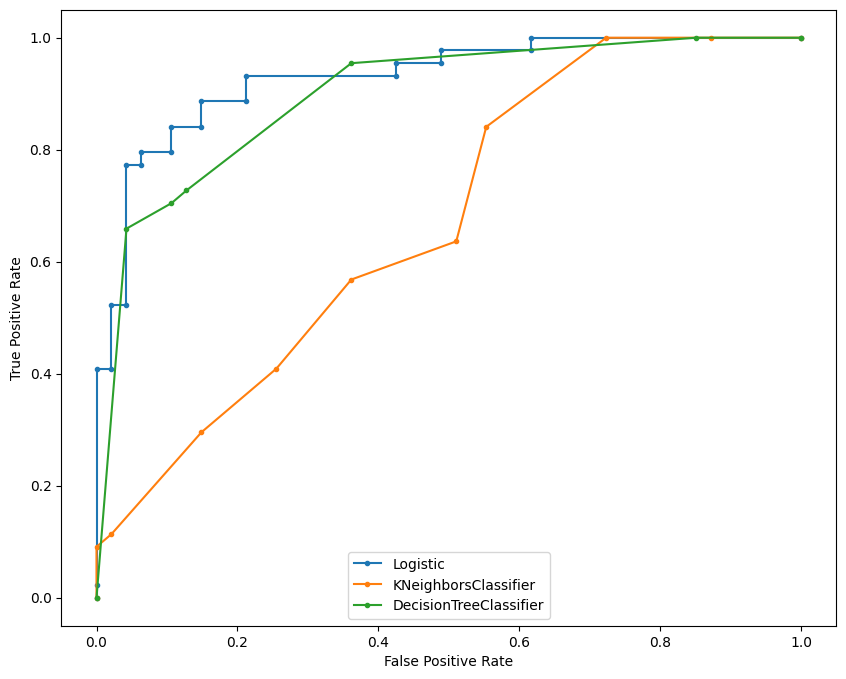

In [77]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
ax.plot(fpr_knn, tpr_knn, marker='.', label='KNeighborsClassifier')
ax.plot(fpr_dtc, tpr_dtc, marker='.', label='DecisionTreeClassifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=8)

plt.show()

**From the above Graph it can be clearly interpreted that the area under the Logistic curve is more than the other two curves and hence provides a better accuracy.**

In [78]:
from sklearn.metrics import roc_auc_score

auc_lr = roc_auc_score(y_test, prob_lr)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_dtc = roc_auc_score(y_test, prob_dtc)

print(f'Logistic : ROC AUC = {round(auc_lr, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_knn, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_dtc, 3)*100} %')

Logistic : ROC AUC = 92.9 %
Logistic : ROC AUC = 67.2 %
Logistic : ROC AUC = 89.7 %


The roc_auc_score can also be calculated using the above module.The roc_auc_score of LogisticRegression is 92.1% which is much greater than the other two.

**Code to allow user to query by providing details of a patient as input and determining whether the patient lives or dies**

In [79]:
#from pandas.core.window.expanding import ExpandingGroupby
#from matplotlib.projections.polar import ThetaAxis
#n = int(input("Enter no of Patients who's Status is to be Determined :- "))

#def Prediction() :
  #age = int(input("Age of the Patient :- "))
  #sex = int(input("Sex of the Patient (0 - female & 1 - male) :- "))
  #cp = int(input("Chest Pain Type :- "))
  #trestbps = int(input("Resting Blood Pressure :- "))
  #chol = int(input("Serum Cholestrol :- "))
  #fbs = int(input("Fasting Blood Sugar :- "))
  #restecg = int(input("Resting ElectroCardiographic Result :- "))
  #thalach = int(input("Maximum Heart Rate Achieved :- "))
  #exang = int(input("Exercise-include angina (1 - True, 0 - False) :- "))
  #oldpeak = float(input("ST Depression induced by Exercise relative to Rest :- "))
  #slope = int(input("Slope of Peak Exercise ST segment :- "))
  #ca = int(input("No. of Major Vessels (0-3) :- "))
  #thal = int(input("Thalasemia Indicator :- "))
  #new_patient = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])

  #new_patient = new_patient.reshape(1,-1) #converting to 2D array

  #if clf_lr.predict(new_patient) == 0 :
   # return "The Patient with the above provided Vitals Dies!!!"
  #else :
   # return "The Patient with the above provided vitals Lives!!!"

#for i in range(n) :
 # print(Prediction())

**According to the above provided vitals taken from a random patient our model has predicted that the Patient Lives. The model can be used to check the status of any number of patients at a time which is time saving.**